Case Study Price Analysis Using Python

Objective: 
Analyse and visualize stock price data to identify trends, calculate moving averages, and 
assess stock volatility. 

Case Study Scenario: 
You are a data analyst working for an investment firm. Your task is to analyze historical 
stock price data for a specific company to help the team understand past performance and 
identify potential future trends. You will work with a dataset containing stock prices over a 
multi-year period. 

Dataset: stock_prices.csv

Questions

1. Data Preparation 

 Load the dataset using pandas. 

In [1]:
import pandas as pd
df=pd.read_csv("stock_prices.csv")

In [2]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741


In [3]:
df.isnull().sum()

Date                    0
Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                866
Deliverable Volume      0
%Deliverble             0
dtype: int64

Handle missing or duplicate values if present.

In [4]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

In [5]:
df.isnull().sum()

Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

Ensure the Date column is in datetime format and set it as the index

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [7]:
df.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2011-06-01,MUNDRAPORT,EQ,161.45,162.10,165.70,161.25,163.50,164.00,164.08,2574106,4.223703e+13,19171.0,1271255,0.4939
2011-06-02,MUNDRAPORT,EQ,164.00,164.00,165.15,160.15,161.15,161.25,162.17,1699298,2.755678e+13,16176.0,791462,0.4658
2011-06-03,MUNDRAPORT,EQ,161.25,161.50,162.80,159.20,161.00,161.05,161.02,1185817,1.909361e+13,14810.0,722154,0.6090
2011-06-06,MUNDRAPORT,EQ,161.05,160.50,161.10,159.05,160.00,159.85,160.09,546378,8.746905e+12,7071.0,386144,0.7067
2011-06-07,MUNDRAPORT,EQ,159.85,159.85,162.75,156.35,157.00,157.25,158.52,2193466,3.477027e+13,17865.0,1425849,0.6500


2. Descriptive Analysis  

Display basic statistics (mean, median, standard deviation) for the Open, 
Close, High, and Low columns. 

In [8]:
print(df[['Open', 'Close', 'High', 'Low']].describe())

              Open       Close         High          Low
count  2456.000000  2456.00000  2456.000000  2456.000000
mean    284.940574   284.62730   289.532431   279.773270
std     121.652830   121.55882   123.447474   119.573734
min     108.000000   108.00000   110.450000   105.650000
25%     156.925000   157.02500   160.312500   154.287500
50%     299.475000   298.75000   303.825000   293.725000
75%     368.812500   368.21250   373.925000   363.762500
max     857.000000   835.55000   885.000000   817.050000


Identify the date on which the stock reached its highest and lowest closing 
prices. 

In [9]:
highest_close = df['Close'].idxmax()
lowest_close = df['Close'].idxmin()
print(f'Highest closing price on: {highest_close} - {df.loc[highest_close, "Close"]}')
print(f'Lowest closing price on: {lowest_close} - {df.loc[lowest_close, "Close"]}')

Highest closing price on: 2021-04-06 00:00:00 - 835.55
Lowest closing price on: 2012-08-27 00:00:00 - 108.0


3. Moving Average Calculation 

Calculate and add new columns for the 7-day and 30-day moving averages 
of the closing price.

In [10]:
df['7-day MA'] = df['Close'].rolling(window=7).mean()
df['30-day MA'] = df['Close'].rolling(window=30).mean()


Visualize the closing price alongside both moving averages using Matplotlib 
or Seaborn.

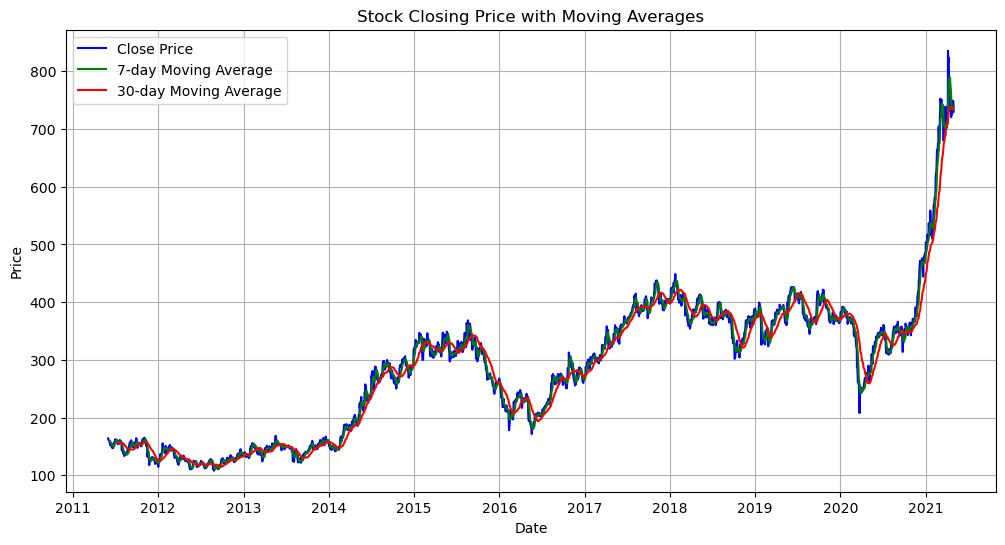

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Close Price', color='blue')
plt.plot(df['7-day MA'], label='7-day Moving Average', color='green')
plt.plot(df['30-day MA'], label='30-day Moving Average', color='red')
plt.legend()
plt.title('Stock Closing Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.show()

The stock price goes up and down a lot, but the moving averages help spot the general direction.

The 7-day average follows the price closely, while the 30-day average is smoother and slower to react.

The price has a big increase after 2020, meaning the stock gained value quickly.

These trend lines help investors see patterns and decide when to buy or sell.

4. Volatility Analysis  

Calculate daily returns using the closing price.

In [12]:
df['Daily Returns'] = df['Close'].pct_change()

Daily Return= 
Today’s Close−Yesterday’s Close / Yesterday’s Close
​
 


Measure stock volatility as the standard deviation of daily returns over a 
rolling 30-day window. 

In [13]:
df['Volatility'] = df['Daily Returns'].rolling(window=30).std()

Plot the volatility over time. 

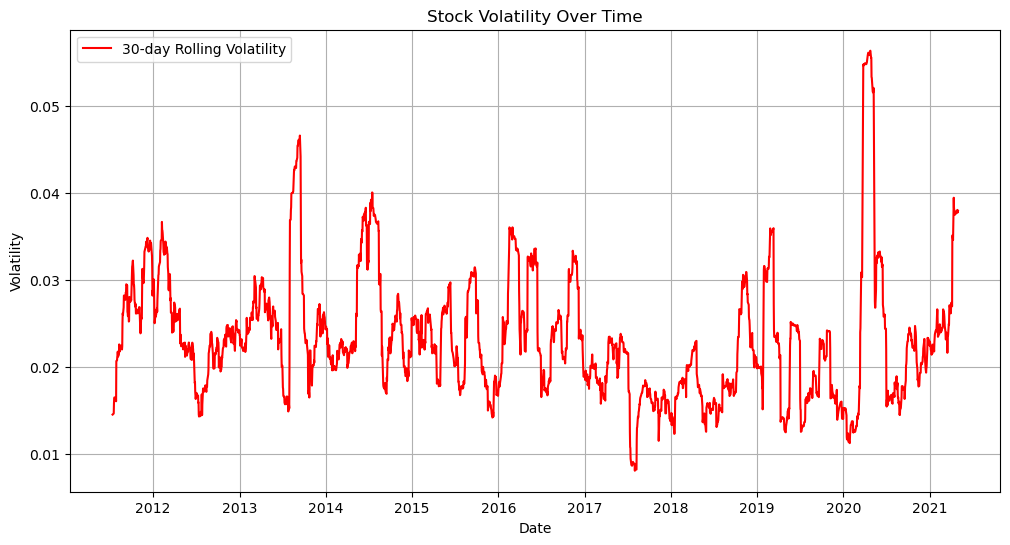

In [14]:
plt.figure(figsize=(12,6))
plt.plot(df['Volatility'], label='30-day Rolling Volatility', color='red')
plt.legend()
plt.title('Stock Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.grid()
plt.show()

The graph shows 30-day rolling volatility of a stock over time.

Higher peaks indicate increased fluctuations in stock price (more risk).

Lower valleys indicate stable periods with fewer price fluctuations.

5. Trend Analysis 

○ Identify bullish (uptrend) and bearish (downtrend) periods based on the 
moving averages: 
■ Bullish: 7-day moving average > 30-day moving average 
■ Bearish: 7-day moving average < 30-day moving average 

In [15]:
df['Trend'] = ['Bullish' if ma7 > ma30 else 'Bearish' for ma7, ma30 in zip(df['7-day MA'], df['30-day MA'])]
trend_counts = df['Trend'].value_counts()
print(f'Bullish Days: {trend_counts.get("Bullish", 0)}')
print(f'Bearish Days: {trend_counts.get("Bearish", 0)}')

Bullish Days: 1385
Bearish Days: 1071


 Count the number of days in each trend. 

In [16]:
df['Buy Signal'] = (df['7-day MA'] > df['30-day MA']) & (df['7-day MA'].shift(1) <= df['30-day MA'].shift(1))
df['Sell Signal'] = (df['7-day MA'] < df['30-day MA']) & (df['7-day MA'].shift(1) >= df['30-day MA'].shift(1))

6. Investment Insight  

 Identify a buy signal when the 7-day moving average crosses above the 
30-day moving average. 

Identify a sell signal when the 7-day moving average crosses below the 
30-day moving average.

 Provide three key insights about the stock's historical performance.

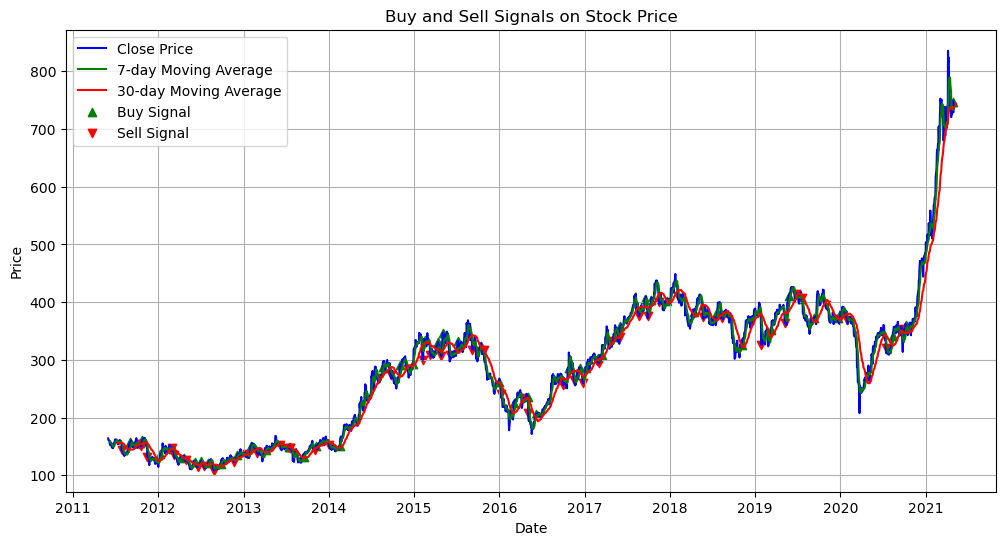

In [17]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Close Price', color='blue')
plt.plot(df['7-day MA'], label='7-day Moving Average', color='green')
plt.plot(df['30-day MA'], label='30-day Moving Average', color='red')
plt.scatter(df[df['Buy Signal']].index, df[df['Buy Signal']]['Close'], marker='^', color='g', label='Buy Signal')
plt.scatter(df[df['Sell Signal']].index, df[df['Sell Signal']]['Close'], marker='v', color='r', label='Sell Signal')
plt.legend()
plt.title('Buy and Sell Signals on Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.show()


Steady Growth Over Time – The stock price has increased a lot, especially after 2020, showing strong long-term growth.

Ups and Downs – The stock had some big drops but recovered quickly, meaning it's sometimes risky but has bounced back well.

Buy/Sell Signals Work Well – The moving average method correctly showed good times to buy and sell, helping traders make better decisions.